In [494]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from skimage.util import random_noise

%matplotlib inline

In [ ]:
def simulate_low_light(image, gamma=1.0, noise_peak=1.0, white_balance)

In [573]:
class SimulateCondition:
    def __init__(self, image, gamma_correction=True, noise=True, white_balance=True, black_level=True):
        self.image = image
        
        self.gamma_correction = gamma_correction
        self.noise = noise
        self.white_balance = white_balance
        self.black_level = black_level
        
        self.GAMMA = np.random.uniform(0.3, 0.6, 1)[0]
#         self.GAMMA = 0.5
        self.NOISE_PEAK = 0.5
        self.WB = np.random.uniform(0.7, 1.0, 3)
        self.BL = 50
        
        self.img_rows, self.img_cols, self.img_colors = image.shape
        
    def adjust_gamma(self, image):
        invGamma = 1.0 / self.GAMMA
        table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
        return cv2.LUT(image, table)
    
    def add_noise(self, image):
        #noisy = np.random.poisson(image / 255.0 * self.NOISE_PEAK) / self.NOISE_PEAK * 255
#         noisy = np.random.poisson(image)
#         noisy = np.uint8(image + noisy*self.NOISE_PEAK)
        noisy = np.uint8(random_noise(image, mode='poisson') * 255.0)
        return noisy
    
    def remove_white_balance(self, image):
        white_unbalanced =  np.zeros((self.img_rows,self.img_cols,self.img_colors), dtype='uint8')
        white_unbalanced[:,:,0] = np.int8(self.WB[0] * image[:,:,0])
        white_unbalanced[:,:,1] = np.int8(self.WB[1] * image[:,:,1])
        white_unbalanced[:,:,2] = np.int8(self.WB[2] * image[:,:,2])
        return white_unbalanced
    
    def increase_black_level(self, image):
        bl_image = np.copy(image)
        bl_image[bl_image<self.BL] = self.BL
        bl_image = bl_image - self.BL
        return bl_image
    
    def low_light(self):
        image = self.adjust_gamma(self.image)             #image with gamma correction
        if self.white_balance:
            image = self.remove_white_balance(image)     #image with gamma correction, noise, reduced white balance  
        image = self.add_noise(image)                     #image with gamma correction, noise
        image = self.increase_black_level(image)         #image with gamma correction, noise, reduced white balance, added black level
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image     

In [574]:
def show_image(image, convert=False):
    if convert:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

In [580]:
img = cv2.imread('./flickr30K_images/flickr30K_images/20977655.jpg')
# img = cv2.imread('./a0014-WP_CRW_6320.dng')
img.shape

(375, 500, 3)

In [581]:
sim = SimulateCondition(img)

In [582]:
ll_img = sim.low_light()

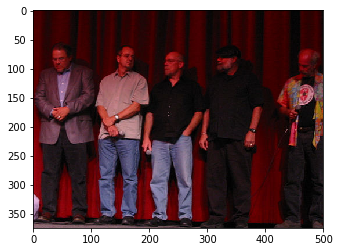

In [583]:
show_image(img, convert=True)

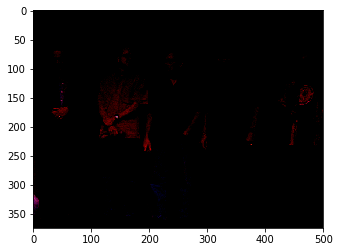

In [584]:
show_image(ll_img)